In [2]:
import os
import glob
import subprocess
import tarfile
import wget
import copy
from omegaconf import OmegaConf, open_dict

In [4]:
data_dir = 'datasets/'

if not os.path.exists(data_dir):
  os.makedirs(data_dir, exist_ok=True)

if not os.path.exists("scripts"):
  os.makedirs("scripts")

In [1]:
import nemo
import nemo.collections.asr as nemo_asr
from nemo.collections.asr.metrics.wer import word_error_rate
from nemo.utils import logging, exp_manager

In [5]:
from huggingface_hub import login
login()

In [6]:
VERSION = "mozilla-foundation/common_voice_17_0"
LANGUAGE = "ta"

In [7]:
tokenizer_dir = os.path.join('tokenizers', LANGUAGE)
manifest_dir = os.path.join('datasets', LANGUAGE, VERSION, LANGUAGE)

In [8]:
# If something goes wrong during data processing, un-comment the following line to delete the cached dataset
# !rm -rf datasets/$LANGUAGE
!mkdir -p datasets

In [9]:
if not os.path.exists("convert_hf_dataset_to_nemo.py"):
    !wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/scripts/speech_recognition/convert_hf_dataset_to_nemo.py

--2025-05-27 12:09:48--  https://raw.githubusercontent.com/NVIDIA/NeMo//scripts/speech_recognition/convert_hf_dataset_to_nemo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /NVIDIA/NeMo/scripts/speech_recognition/convert_hf_dataset_to_nemo.py [following]
--2025-05-27 12:09:49--  https://raw.githubusercontent.com/NVIDIA/NeMo/scripts/speech_recognition/convert_hf_dataset_to_nemo.py
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 404 Not Found
2025-05-27 12:09:49 ERROR 404: Not Found.



In [10]:
import os

BRANCH = "main"  # Or another known working branch/tag
url = f"https://raw.githubusercontent.com/NVIDIA/NeMo/{BRANCH}/scripts/speech_recognition/convert_hf_dataset_to_nemo.py"

if not os.path.exists("convert_hf_dataset_to_nemo.py"):
    os.system(f"wget {url}")


--2025-05-27 12:14:05--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/scripts/speech_recognition/convert_hf_dataset_to_nemo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14821 (14K) [text/plain]
Saving to: ‘convert_hf_dataset_to_nemo.py’

     0K .......... ....                                       100% 5.49M=0.003s

2025-05-27 12:14:05 (5.49 MB/s) - ‘convert_hf_dataset_to_nemo.py’ saved [14821/14821]



In [ ]:
# # !python convert_hf_dataset_to_nemo.py \
# #   --data_root "datasets/$LANGUAGE/" \
# #   --manifest_dir=$manifest_dir \
# #   --sample_rate=16000 \
# #   --n_channels=1 \
# #   --version=$VERSION \
# #   --language=$LANGUAGE \
# #   --files_to_process 'train.tsv' 'dev.tsv' 'test.tsv'

# !python convert_hf_dataset_to_nemo.py \
#     output_dir=datasets/LANGU AGE path=VERSION \
#     name=$LANGUAGE \
#     split="train" \
#     ensure_ascii=False \
#     use_auth_token=True

# !python convert_hf_dataset_to_nemo.py \
#     output_dir=datasets/LANGU AGE path=VERSION \
#     name=$LANGUAGE \
#     split="validation" \
#     ensure_ascii=False \
#     use_auth_token=True

# !python convert_hf_dataset_to_nemo.py \
#     output_dir=datasets/LANGU AGE path=VERSION  \
#     name=$LANGUAGE \
#     split="test" \
#     ensure_ascii=False \
#     use_auth_token=True

/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/convert_hf_dataset_to_nemo.py:349: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name='hfds_config', config_path=None)
Error parsing override 'AGE'
missing EQUAL at '<EOF>'
See https://hydra.cc/docs/1.2/advanced/override_grammar/basic for details

Set the environment variable HYDRA_FULL_ERROR=1 for a complete stack trace.
/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/convert_hf_dataset_to_nemo.py:349: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name='hfds_config', config_path=None)
Error parsing override 'AGE'
missing EQUAL at '<EOF>'
See https://hydra.cc/docs/1.2/advanced/override_grammar/basic for details

Set the environment variable HYDRA

In [17]:
language = "ta"  # or your target language code
version = "mozilla-foundation/common_voice_17_0"
output_dir = f"datasets/{language}"

!python convert_hf_dataset_to_nemo.py \
    output_dir={output_dir} path={version} \
    name={language} \
    split="train" \
    ensure_ascii=False \
    use_auth_token=True

!python convert_hf_dataset_to_nemo.py \
    output_dir={output_dir} path={version} \
    name={language} \
    split="validation" \
    ensure_ascii=False \
    use_auth_token=True

!python convert_hf_dataset_to_nemo.py \
    output_dir={output_dir} path={version} \
    name={language} \
    split="test" \
    ensure_ascii=False \
    use_auth_token=True


/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/convert_hf_dataset_to_nemo.py:349: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name='hfds_config', config_path=None)
/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/venv/lib/python3.12/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
Generating train split: 0 examples [00:00, ? examples/s]
Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10631it [00:00, 106301.99it/s]
Reading metadata...: 45587it [00:00, 179334.85it/s]
Generating train split: 45587 examples [00:04, 9787.36 examples/s] 
Generating validation split: 0 examples [00:00, ? examples/s]
Reading me

In [13]:
train_manifest = "datasets/ta/mozilla-foundation/common_voice_17_0/ta/train/train_mozilla-foundation_common_voice_17_0_manifest.json"
dev_manifest = "datasets/ta/mozilla-foundation/common_voice_17_0/ta/validation/validation_mozilla-foundation_common_voice_17_0_manifest.json"
test_manifest = "datasets/ta/mozilla-foundation/common_voice_17_0/ta/test/test_mozilla-foundation_common_voice_17_0_manifest.json"


In [3]:
# Manifest Utils
from tqdm.auto import tqdm
from nemo.collections.asr.parts.utils.manifest_utils import read_manifest, write_manifest
import json


def write_processed_manifest(data, original_path):
    original_manifest_name = os.path.basename(original_path)
    new_manifest_name = original_manifest_name.replace(".json", "_processed.json")

    manifest_dir = os.path.split(original_path)[0]
    filepath = os.path.join(manifest_dir, new_manifest_name)
    write_manifest(filepath, data)
    print(f"Finished writing manifest: {filepath}")
    return filepath

In [4]:
train_manifest_data = read_manifest(train_manifest)
dev_manifest_data = read_manifest(dev_manifest)
test_manifest_data = read_manifest(test_manifest)

In [5]:
train_text = [data['text'] for data in train_manifest_data]
dev_text = [data['text'] for data in dev_manifest_data]
test_text = [data['text'] for data in test_manifest_data]

In [6]:
from collections import defaultdict

def get_charset(manifest_data):
    charset = defaultdict(int)
    for row in tqdm(manifest_data, desc="Computing character set"):
        text = row['text']
        for character in text:
            charset[character] += 1
    return charset

In [7]:
train_charset = get_charset(train_manifest_data)
dev_charset = get_charset(dev_manifest_data)
test_charset = get_charset(test_manifest_data)

Computing character set:   0%|          | 0/45587 [00:00<?, ?it/s]

Computing character set:   0%|          | 0/12095 [00:00<?, ?it/s]

Computing character set:   0%|          | 0/12074 [00:00<?, ?it/s]

In [8]:
train_dev_set = set.union(set(train_charset.keys()), set(dev_charset.keys()))
test_set = set(test_charset.keys())
     

In [9]:
print(f"Number of tokens in train+dev set : {len(train_dev_set)}")
print(f"Number of tokens in test set : {len(test_set)}")

Number of tokens in train+dev set : 136
Number of tokens in test set : 116


In [10]:
# OOV tokens in test set
train_test_common = set.intersection(train_dev_set, test_set)
test_oov = test_set - train_test_common
print(f"Number of OOV tokens in test set : {len(test_oov)}")
print()
print(test_oov)
     

Number of OOV tokens in test set : 1

{'½'}


In [11]:
# Populate dictionary mapping count: list[tokens]
train_counts = defaultdict(list)
for token, count in train_charset.items():
    train_counts[count].append(token)
for token, count in dev_charset.items():
    train_counts[count].append(token)

# Compute sorter order of the count keys
count_keys = sorted(list(train_counts.keys()))

In [12]:
MAX_COUNT = 32

TOKEN_COUNT_X = []
NUM_TOKENS_Y = []
for count in range(1, MAX_COUNT + 1):
    if count in train_counts:
        num_tokens = len(train_counts[count])

        TOKEN_COUNT_X.append(count)
        NUM_TOKENS_Y.append(num_tokens)

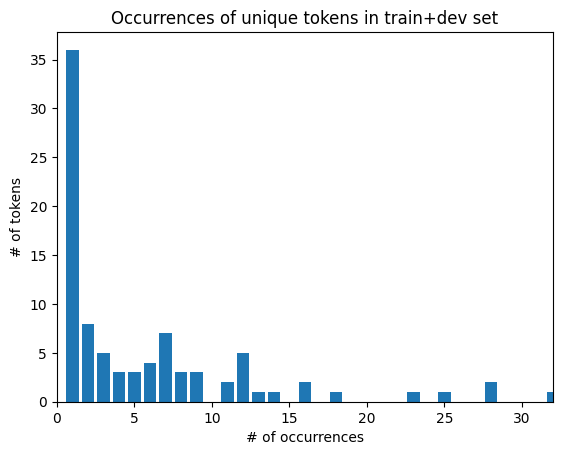

In [13]:
import matplotlib.pyplot as plt

plt.bar(x=TOKEN_COUNT_X, height=NUM_TOKENS_Y)
plt.title("Occurrences of unique tokens in train+dev set")
plt.xlabel("# of occurrences")
plt.ylabel("# of tokens")
plt.xlim(0, MAX_COUNT);

In [14]:
UNCOMMON_TOKENS_COUNT = 5

chars_with_infrequent_occurrence = set()
for count in range(1, UNCOMMON_TOKENS_COUNT + 1):
    if count in train_counts:
        token_list = train_counts[count]
        chars_with_infrequent_occurrence.update(set(token_list))

print(f"Number of tokens with <= {UNCOMMON_TOKENS_COUNT} occurrences : {len(chars_with_infrequent_occurrence)}")

Number of tokens with <= 5 occurrences : 50


In [15]:
all_tokens = set.union(train_dev_set, test_set)
print(f"Original train+dev+test vocab size : {len(all_tokens)}")

extra_kanji = set(test_oov)
train_token_set = all_tokens - extra_kanji
print(f"New train vocab size : {len(train_token_set)}")

Original train+dev+test vocab size : 137
New train vocab size : 136


In [16]:
import unicodedata

def normalize_tamil(text):
    return unicodedata.normalize("NFC", text)

normalized_train_token_set = {normalize_tamil(t) for t in train_token_set}
print(f"After Tamil normalization, number of train tokens: {len(normalized_train_token_set)}")


After Tamil normalization, number of train tokens: 136


In [17]:
import re
# Tamil-safe punctuation removal
chars_to_ignore_regex = r"[.,!?\"';:()%[\]{}“”‘’—–…`~]"

def preprocess_text(data):
    text = data["text"]
    text = unicodedata.normalize("NFC", text)  # optional, if needed
    text = re.sub(chars_to_ignore_regex, '', text)
    data["text"] = text.strip()
    return data

In [18]:
# Processing pipeline
def apply_preprocessors(manifest, preprocessors):
    for processor in preprocessors:
        for idx in tqdm(range(len(manifest)), desc=f"Applying {processor.__name__}"):
            manifest[idx] = processor(manifest[idx])

    print("Finished processing manifest !")
    return manifest

In [19]:
PREPROCESSORS = [
    preprocess_text,  # This includes NFC normalization and Tamil-safe punctuation removal
]


In [21]:
import os
# Load manifests
train_data = read_manifest(train_manifest)
dev_data = read_manifest(dev_manifest)
test_data = read_manifest(test_manifest)

# Apply preprocessing
train_data_processed = apply_preprocessors(train_data, PREPROCESSORS)
dev_data_processed = apply_preprocessors(dev_data, PREPROCESSORS)
test_data_processed = apply_preprocessors(test_data, PREPROCESSORS)

# Write new manifests
train_manifest_cleaned = write_processed_manifest(train_data_processed, train_manifest)
dev_manifest_cleaned = write_processed_manifest(dev_data_processed, dev_manifest)
test_manifest_cleaned = write_processed_manifest(test_data_processed, test_manifest)


Applying preprocess_text:   0%|          | 0/45587 [00:00<?, ?it/s]

Finished processing manifest !


Applying preprocess_text:   0%|          | 0/12095 [00:00<?, ?it/s]

Finished processing manifest !


Applying preprocess_text:   0%|          | 0/12074 [00:00<?, ?it/s]

Finished processing manifest !
Finished writing manifest: datasets/ta/mozilla-foundation/common_voice_17_0/ta/train/train_mozilla-foundation_common_voice_17_0_manifest_processed.json
Finished writing manifest: datasets/ta/mozilla-foundation/common_voice_17_0/ta/validation/validation_mozilla-foundation_common_voice_17_0_manifest_processed.json
Finished writing manifest: datasets/ta/mozilla-foundation/common_voice_17_0/ta/test/test_mozilla-foundation_common_voice_17_0_manifest_processed.json


In [22]:
train_manifest_data = read_manifest(train_manifest_cleaned)
train_charset = get_charset(train_manifest_data)

dev_manifest_data = read_manifest(dev_manifest_cleaned)
dev_charset = get_charset(dev_manifest_data)

train_dev_set = set.union(set(train_charset.keys()), set(dev_charset.keys()))
     

print(f"Number of tokens in preprocessed train+dev set : {len(train_dev_set)}")

Computing character set:   0%|          | 0/45587 [00:00<?, ?it/s]

Computing character set:   0%|          | 0/12095 [00:00<?, ?it/s]

Number of tokens in preprocessed train+dev set : 118


In [4]:
from nemo.collections.asr.models import EncDecCTCModel

char_model = EncDecCTCModel.from_pretrained("nvidia/parakeet-tdt-0.6b-v2", map_location='cuda:0')


[NeMo I 2025-05-28 14:17:54 nemo_logging:393] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2025-05-28 14:17:54 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    use_lhotse: true
    skip_missing_manifest_entries: true
    input_cfg: null
    tarred_audio_filepaths: null
    manifest_filepath: null
    sample_rate: 16000
    shuffle: true
    num_workers: 2
    pin_memory: true
    max_duration: 40.0
    min_duration: 0.1
    text_field: answer
    batch_duration: null
    use_bucketing: true
    bucket_duration_bins: null
    bucket_batch_size: null
    num_buckets: 30
    bucket_buffer_size: 20000
    shuffle_buffer_size: 10000
    
[NeMo W 2025-05-28 14:17:54 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config :

[NeMo I 2025-05-28 14:17:54 nemo_logging:393] PADDING: 0
[NeMo I 2025-05-28 14:17:57 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}
[NeMo I 2025-05-28 14:17:57 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}


[NeMo W 2025-05-28 14:17:57 nemo_logging:405] No conditional node support for Cuda.
    Cuda graphs with while loops are disabled, decoding speed will be slower
    Reason: No `cuda-python` module. Please do `pip install cuda-python>=12.3`


[NeMo I 2025-05-28 14:17:57 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}


[NeMo W 2025-05-28 14:17:57 nemo_logging:405] No conditional node support for Cuda.
    Cuda graphs with while loops are disabled, decoding speed will be slower
    Reason: No `cuda-python` module. Please do `pip install cuda-python>=12.3`


[NeMo I 2025-05-28 14:17:59 nemo_logging:393] Model EncDecRNNTBPEModel was successfully restored from /home/user/.cache/huggingface/hub/models--nvidia--parakeet-tdt-0.6b-v2/snapshots/c4b828d094af2c7238dfe03b58e0c56bc69ea57a/parakeet-tdt-0.6b-v2.nemo.


In [24]:
existing_vocab = char_model.tokenizer.vocab  # already a list of tokens

print(f"Existing vocab size: {len(existing_vocab)}")
print(f"First 20 tokens: {existing_vocab[:1024]}")


Existing vocab size: 1024
First 20 tokens: ['<unk>', '▁t', '▁th', '▁a', 'in', '▁the', 're', '▁w', '▁o', '▁s', 'at', 'ou', 'er', 'nd', '▁i', '▁b', '▁c', 'on', '▁h', 'ing', '▁to', '▁m', 'en', '▁f', '▁p', 'an', '▁d', 'es', 'or', 'll', '▁of', '▁and', '▁y', '▁l', '▁I', 'it', '▁in', 'is', 'ed', '▁g', '▁you', 'ar', '▁that', 'om', 'as', '▁n', 've', 'us', 'ic', 'ow', 'al', '▁it', '▁be', '▁wh', 'le', 'ion', 'ut', 'ot', '▁we', '▁is', '▁e', 'et', 'ay', '▁re', '▁on', '▁T', '▁A', '▁ha', 'ent', 'ke', 'ct', '▁S', 'ig', 'ver', '▁Th', 'all', 'id', '▁for', 'ro', '▁he', 'se', '▁this', 'ld', 'ly', '▁go', '▁k', '▁st', 'st', 'ch', '▁li', '▁u', 'am', 'ur', 'ce', 'ith', 'im', '▁so', '▁have', '▁do', 'ht', 'th', '▁an', '▁with', 'ad', '▁r', 'ir', '▁was', '▁as', '▁W', '▁are', 'ust', 'ally', '▁j', '▁se', 'ation', 'od', 'ere', '▁like', '▁not', '▁kn', 'ight', '▁B', '▁they', '▁And', '▁know', 'ome', 'op', '▁can', '▁or', '▁sh', '▁me', 'ill', 'ant', 'ck', '▁what', '▁at', '▁ab', 'ould', 'ol', '▁So', '▁C', 'use', 'ter', 'i

In [25]:
print(dir(char_model.tokenizer))
print(type(char_model.tokenizer))
print(char_model.tokenizer)


['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_text_to_ids', '_text_to_ids_extra_space', 'add_special_tokens', 'additional_special_tokens_ids', 'apply_chat_template', 'bos', 'bos_id', 'chat_template', 'cls', 'cls_id', 'eod', 'eos', 'eos_id', 'extra_space_token', 'has_chat_template', 'id_to_special_token', 'ids_to_text', 'ids_to_tokens', 'ignore_extra_whitespaces', 'legacy', 'mask', 'mask_id', 'name', 'original_vocab_size', 'pad', 'pad_id', 'removed_extra_spaces', 'sep', 'sep_id', 'space_sensitive', 'special_token_to_id', 'spm_separator', 'spm_separator_id', 'supported_punctuation', 'supports_capitalization', 'text_to_ids', 'tex

In [26]:
tamil_tokens = set(train_dev_set)
combined_vocab = existing_vocab + [t for t in tamil_tokens if t not in existing_vocab]

print(f"Existing vocab size: {len(existing_vocab)}")
print(f"Tamil tokens size: {len(tamil_tokens)}")
print(f"Combined vocab size: {len(combined_vocab)}")

# char_model.change_vocabulary(combined_vocab, "sentencepiece")

# print("Vocabulary updated successfully!")


Existing vocab size: 1024
Tamil tokens size: 118
Combined vocab size: 1085


In [7]:
import json

def extract_texts_from_manifest(manifest_path):
    texts = []
    with open(manifest_path, 'r', encoding='utf-8') as f:
        for line in f:
            item = json.loads(line)
            texts.append(item['text'])
    return texts


# Extract texts
train_texts = extract_texts_from_manifest(train_manifest)
dev_texts = extract_texts_from_manifest(dev_manifest)
test_texts = extract_texts_from_manifest(test_manifest)

# Combine all texts into one list
all_texts = train_texts + dev_texts + test_texts

# Write combined corpus to a file
combined_corpus_path = 'combined_train_dev_test_corpus.txt'
with open(combined_corpus_path, 'w', encoding='utf-8') as f:
    for line in all_texts:
        f.write(line.strip() + '\n')

print(f"Combined corpus saved to {combined_corpus_path} with {len(all_texts)} lines.")


Combined corpus saved to combined_train_dev_test_corpus.txt with 69756 lines.


In [47]:
print("Starting vocabulary combination...")
print(f"Original English vocab size: {len(char_model.tokenizer.vocab)}")
print(f"Tamil token set size: {len(train_dev_set)}")

Starting vocabulary combination...
Original English vocab size: 1024
Tamil token set size: 118


In [91]:
existing_vocab = char_model.tokenizer.vocab
tamil_tokens = list(train_dev_set)

In [51]:
tamil_only = [t for t in tamil_tokens if t not in existing_vocab]
print(f"Tamil tokens not in English vocab: {len(tamil_only)}")
print(f"Sample new Tamil tokens: {tamil_only[:61]}")

Tamil tokens not in English vocab: 61
Sample new Tamil tokens: ['″', 'ர', 'ீ', 'வ', 'இ', 'ம', '◯', 'ஓ', 'த', 'ே', '·', 'ഥ', '′', 'ௗ', 'ட', 'ஊ', 'ோ', 'ன', '¾', 'உ', '\\', 'ஐ', 'அ', 'ற', '●', 'ஸ', 'ு', '•', 'ப', 'ஒ', 'ஈ', 'ந', 'ஏ', '&', 'ங', 'ண', 'ஷ', 'ஞ', 'ூ', 'ௌ', 'ை', 'எ', 'ழ', 'ள', 'ல', 'ஃ', 'ா', 'ெ', 'ொ', ' ', 'ஹ', 'ஔ', '்', 'க', 'ி', 'ஜ', 'ஆ', '_', 'ச', 'ய', '‚']


In [90]:
print(f"existing English vocab: {len(existing_vocab)}")
print(f"Sample existing tokens: {existing_vocab[:10]}")

existing English vocab: 1024
Sample existing tokens: ['<unk>', '▁t', '▁th', '▁a', 'in', '▁the', 're', '▁w', '▁o', '▁s']


In [50]:
combined_vocab = existing_vocab + tamil_only
print(f"Final combined vocab size: {len(combined_vocab)}")

Final combined vocab size: 1085


## vocabulary add


In [34]:
from datasets import load_dataset

english_dataset = load_dataset("wikipedia", "20220301.en", split="train")
english_text = [item['text'] for item in english_dataset]


Loading dataset shards:   0%|          | 0/41 [00:00<?, ?it/s]

In [35]:
# Save the English Wikipedia corpus to a text file
english_corpus_path = 'english_wikipedia_corpus.txt'
with open(english_corpus_path, 'w', encoding='utf-8') as f:
    for text in english_text:
        f.write(text.strip() + '\n')

print(f"English corpus saved to {english_corpus_path}")


English corpus saved to english_wikipedia_corpus.txt


In [28]:
import os
from tokenizers import Tokenizer, models, trainers, pre_tokenizers

# Create tokenizer directory in your current working directory
tokenizer_dir = "english_tamil_tokenizer_dir"
os.makedirs(tokenizer_dir, exist_ok=True)

# Verify it was created
print(f"Directory exists: {os.path.exists(tokenizer_dir)}")
print(f"Current working directory: {os.getcwd()}")
print(f"Full path: {os.path.abspath(tokenizer_dir)}")


Directory exists: True
Current working directory: /home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning
Full path: /home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/english_tamil_tokenizer_dir


In [36]:
# Verify files exist and are readable
import os
print(f"Tamil corpus exists: {os.path.exists('combined_train_dev_test_corpus.txt')}")
print(f"English corpus exists: {os.path.exists('english_wikipedia_corpus.txt')}")
print(f"Tamil corpus size: {os.path.getsize('combined_train_dev_test_corpus.txt') / (1024*1024):.1f} MB")
print(f"English corpus size: {os.path.getsize('english_wikipedia_corpus.txt') / (1024*1024):.1f} MB")


Tamil corpus exists: True
English corpus exists: True
Tamil corpus size: 12.0 MB
English corpus size: 18735.3 MB


In [ ]:
import sentencepiece as smp
import os

# Use full paths to your corpus files
tamil_corpus = '/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/combined_train_dev_test_corpus.txt'
english_corpus = '/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/english_wikipedia_corpus.txt'

# Verify files exist with full paths
print(f"Tamil corpus exists: {os.path.exists(tamil_corpus)}")
print(f"English corpus exists: {os.path.exists(english_corpus)}")

# Train with correct parameters (REMOVED verbose=True)
smp.SentencePieceTrainer.train(
    input=f'{tamil_corpus},{english_corpus}',
    model_prefix='/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/english_tamil_tokenizer_dir/tokenizer',
    vocab_size=32000,
    character_coverage=0.9995,
    model_type='bpe',
    num_threads=32,
    train_extremely_large_corpus=True,
    input_sentence_size=10000000,
    shuffle_input_sentence=True,
    pad_id=0,
    unk_id=1,
    bos_id=2,
    eos_id=3,
    pad_piece='<pad>',
    unk_piece='<unk>',
    bos_piece='<s>',
    eos_piece='</s>'
)

print("SentencePiece tokenizer training completed!")


In [2]:
import sentencepiece as spm

# Load trained tokenizer
sp = spm.SentencePieceProcessor()
sp.load('/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/english_tamil_tokenizer_dir/tokenizer.model')

# Test English vs Tamil encoding
english_test = "Hello world, this is a test sentence."
tamil_test = "வணக்கம் உலகம், இது ஒரு சோதனை வாக்கியம்."

print("English tokens:", sp.encode_as_pieces(english_test))
print("Tamil tokens:", sp.encode_as_pieces(tamil_test))
print("Vocab size:", sp.get_piece_size())


English tokens: ['▁', 'H', 'ell', 'o', '▁', 'w', 'or', 'ld', ',', '▁', 'th', 'is', '▁', 'is', '▁a', '▁t', 'est', '▁s', 'ent', 'en', 'ce', '.']
Tamil tokens: ['▁வணக்கம்', '▁உலகம்', ',', '▁இது', '▁ஒரு', '▁சோதனை', '▁வாக்கியம்', '.']
Vocab size: 32000


In [7]:
import sentencepiece as smp
import os

# Load your trained tokenizer
sp = smp.SentencePieceProcessor()
sp.load('/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/english_tamil_tokenizer_dir/tokenizer.model')

# Create vocab.txt file that NeMo expects
target_dir = '/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/english_tamil_tokenizer_dir'
vocab_file = os.path.join(target_dir, 'vocab.txt')

# Write vocabulary to vocab.txt
with open(vocab_file, 'w', encoding='utf-8') as f:
    for i in range(sp.get_piece_size()):
        piece = sp.id_to_piece(i)
        f.write(f"{piece}\n")

print(f"Created vocab.txt with {sp.get_piece_size()} tokens")
print(f"Files in directory: {os.listdir(target_dir)}")


Created vocab.txt with 32000 tokens
Files in directory: ['tokenizer.vocab', 'vocab.txt', 'tokenizer.model']


In [8]:
import os

target_dir = '/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/english_tamil_tokenizer_dir'
required_files = ['tokenizer.model', 'vocab.txt']

for file in required_files:
    file_path = os.path.join(target_dir, file)
    exists = os.path.exists(file_path)
    size = os.path.getsize(file_path) if exists else 0
    print(f"{file}: {'✅' if exists else '❌'} ({size} bytes)")


tokenizer.model: ✅ (1246137 bytes)
vocab.txt: ✅ (752390 bytes)


In [6]:
import os
import glob

# Search for tokenizer.model files
tokenizer_files = glob.glob("/home/user/**/*tokenizer.model", recursive=True)
print("Found tokenizer.model files:", tokenizer_files)

# Check current working directory
print("Current working directory:", os.getcwd())
print("Files in current dir:", [f for f in os.listdir('.') if 'tokenizer' in f])


Found tokenizer.model files: ['/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/venv/lib64/python3.12/site-packages/lm_eval/models/llama_tokenizer/tokenizer.model', '/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/venv/lib/python3.12/site-packages/lm_eval/models/llama_tokenizer/tokenizer.model', '/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/english_tamil_tokenizer_dir/tokenizer.model', '/home/user/data/VRAI/venv_nemo/lib64/python3.12/site-packages/lm_eval/models/llama_tokenizer/tokenizer.model', '/home/user/data/VRAI/venv_nemo/lib/python3.12/site-packages/lm_eval/models/llama_tokenizer/tokenizer.model', '/home/user/data/backup/Automios/Mukesh/speech_to_text/venv/lib64/python3.12/site-packages/lm_eval/models/llama_tokenizer/tokenizer.model', '/home/user/data/backup/Automios/Mukesh/speech_to_text/venv/lib/python3.12/site-packages/lm_eval/models/llama_tokenizer/tokenizer.model']
Current working directory: /home/user/data/Vijayraja_AI/Automi

In [9]:
char_model.change_vocabulary(
    new_tokenizer_dir="/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/english_tamil_tokenizer_dir",
    new_tokenizer_type="bpe"
)
print("Model vocabulary updated with English-Tamil tokenizer!")


[NeMo W 2025-05-28 14:22:20 nemo_logging:405] You tried to register an artifact under config key=tokenizer.model_path but an artifact for it has already been registered.
[NeMo W 2025-05-28 14:22:20 nemo_logging:405] You tried to register an artifact under config key=tokenizer.vocab_path but an artifact for it has already been registered.
[NeMo W 2025-05-28 14:22:20 nemo_logging:405] You tried to register an artifact under config key=tokenizer.spe_tokenizer_vocab but an artifact for it has already been registered.


[NeMo I 2025-05-28 14:22:21 nemo_logging:393] Tokenizer SentencePieceTokenizer initialized with 32000 tokens


[NeMo I 2025-05-28 14:22:27 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}


[NeMo W 2025-05-28 14:22:27 nemo_logging:405] No conditional node support for Cuda.
    Cuda graphs with while loops are disabled, decoding speed will be slower
    Reason: No `cuda-python` module. Please do `pip install cuda-python>=12.3`


[NeMo I 2025-05-28 14:22:27 nemo_logging:393] Changed decoder to output to ['<pad>', '<unk>', '<s>', '</s>', '்க', '்த', 'ன்', 'ம்', '▁ப', 'ல்', '▁க', '▁அ', 'க்க', '்ட', '▁வ', 'ரு', 'ப்', '▁ம', 'ும்', 'த்த', 'ந்த', '▁இ', 'து', 'ள்', '▁ச', 'ர்', 'ிய', '▁த', '▁ந', '▁எ', 'ப்ப', 'ட்ட', 'ைய', 'ில்', 'ன்ற', 'ிற', 'ங்க', 'ண்ட', '▁உ', 'ற்', 'ாக', 'ர்க', 'க்', 'டு', 'க்கு', '▁அவ', 'ற்ற', '▁ஆ', 'ில', 'ிரு', 'ச்', '▁ஒ', 'ான்', 'ின்', 'டி', 'ல்ல', 'ிர', 'ார்', '▁மு', 'ன்று', '▁செ', 'ான', 'த்து', 'ால்', 'ள்ள', 'ந்து', 'ிக', '▁கொ', 'ார', '▁வி', 'த்', 'ின', 'ர்கள்', 'லை', 'ன்ன', 'ய்', '▁இரு', 'வி', 'று', '▁கு', 'ளை', '▁பெ', 'ண்', '▁போ', '▁கா', '▁ஒரு', 'ட்டு', 'வு', '▁வே', 'ம்ப', 'ண்டு', 'ன்ப', 'ழு', '▁நா', '▁என்று', 'ாத', '▁அத', 'ச்ச', 'ரி', 'கிற', '▁வா', 'மை', '்கு', 'ாம்', 'டை', 'ுக்கு', '▁பு', 'ிக்க', '▁கூ', 'னை', 'டைய', 'டிய', '்ச', '▁பா', 'றி', 'ர்கள', '▁ஏ', 'ரிய', 'ின்ற', 'தி', 'ாம', 'க்கும்', 'ங்கள்', 'ையும்', 'த்தில்', '▁இந்த', 'க்கிற', 'ழ்', 'த்தை', 'வே', '▁பொ', 'ால', '▁செய', 'கு', 'ண்ண', 'ா

In [10]:
import os
import glob

# Search for Tamil manifest files in your system
manifest_patterns = [
    "**/train*mozilla*common_voice*manifest.json",
    "**/validation*mozilla*common_voice*manifest.json", 
    "**/test*mozilla*common_voice*manifest.json",
    "**/*ta*manifest.json",
    "**/*tamil*manifest.json"
]

found_manifests = []
for pattern in manifest_patterns:
    files = glob.glob(pattern, recursive=True)
    found_manifests.extend(files)

print("Found manifest files:")
for manifest in found_manifests:
    print(f"  {manifest}")


Found manifest files:
  datasets/ta/mozilla-foundation/common_voice_17_0/ta/train/train_mozilla-foundation_common_voice_17_0_manifest.json
  datasets/ta/mozilla-foundation/common_voice_17_0/ta/validation/validation_mozilla-foundation_common_voice_17_0_manifest.json
  datasets/ta/mozilla-foundation/common_voice_17_0/ta/test/test_mozilla-foundation_common_voice_17_0_manifest.json


In [12]:
import os

# Check current directory and subdirectories
current_dir = "/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning"
print(f"Current directory: {current_dir}")

# Look for manifest files
for root, dirs, files in os.walk(current_dir):
    for file in files:
        if "manifest.json" in file and ("ta" in file or "tamil" in file):
            full_path = os.path.join(root, file)
            print(f"Found: {full_path}")


Current directory: /home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning


In [11]:
# Check where you ran the dataset conversion
conversion_output_dirs = [
    ".",  # Current directory
    "datasets/",
    "data/",
    "/home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/datasets/"
]

for dir_path in conversion_output_dirs:
    if os.path.exists(dir_path):
        print(f"\nChecking {dir_path}:")
        for item in os.listdir(dir_path):
            if "manifest" in item or "ta" in item:
                print(f"  {item}")



Checking .:
  english_tamil_tokenizer.json
  convert_hf_dataset_to_nemo.log
  convert_hf_dataset_to_nemo.py
  datasets
  english_tamil_tokenizer_dir
  tuning_tamil.ipynb
  minimal_test_manifest.json

Checking datasets/:
  ta

Checking /home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/datasets/:
  ta


## FINETUNING THE MODEL

In [17]:
# Check what keys exist in train_ds
print("Available keys in train_ds:")
print(list(char_model.cfg.train_ds.keys()))

# Check what keys exist in validation_ds  
print("\nAvailable keys in validation_ds:")
print(list(char_model.cfg.validation_ds.keys()))

# Check the full model config structure
print("\nFull model config keys:")
print(list(char_model.cfg.keys()))


Available keys in train_ds:
['use_lhotse', 'skip_missing_manifest_entries', 'input_cfg', 'tarred_audio_filepaths', 'manifest_filepath', 'sample_rate', 'shuffle', 'num_workers', 'pin_memory', 'max_duration', 'min_duration', 'text_field', 'batch_duration', 'use_bucketing', 'bucket_duration_bins', 'bucket_batch_size', 'num_buckets', 'bucket_buffer_size', 'shuffle_buffer_size']

Available keys in validation_ds:
['use_lhotse', 'manifest_filepath', 'sample_rate', 'batch_size', 'shuffle', 'max_duration', 'min_duration', 'num_workers', 'pin_memory', 'text_field']

Full model config keys:
['sample_rate', 'compute_eval_loss', 'log_prediction', 'rnnt_reduction', 'skip_nan_grad', 'model_defaults', 'train_ds', 'validation_ds', 'tokenizer', 'preprocessor', 'spec_augment', 'encoder', 'decoder', 'joint', 'decoding', 'aux_ctc', 'interctc', 'loss', 'optim', 'labels', 'target', 'nemo_version']


In [18]:
# Update manifest paths
char_model.cfg.train_ds.manifest_filepath = train_manifest
char_model.cfg.validation_ds.manifest_filepath = dev_manifest

# Set batch_size only for validation_ds (train_ds doesn't have it)
char_model.cfg.validation_ds.batch_size = 8

# Set num_workers and pin_memory for both
char_model.cfg.train_ds.num_workers = 4
char_model.cfg.validation_ds.num_workers = 2
char_model.cfg.train_ds.pin_memory = True
char_model.cfg.validation_ds.pin_memory = True

# For train_ds, use bucket_batch_size instead of batch_size
char_model.cfg.train_ds.bucket_batch_size = [8, 8, 8]  # Small batches for testing


In [19]:
# Configure optimizer (this exists in your config)
char_model.cfg.optim.name = "adamw"
char_model.cfg.optim.lr = 1e-4
char_model.cfg.optim.weight_decay = 1e-3


In [20]:
# Disable spec augmentation for faster testing
if hasattr(char_model.cfg, 'spec_augment'):
    char_model.cfg.spec_augment.freq_masks = 0
    char_model.cfg.spec_augment.time_masks = 0


In [21]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint

trainer = pl.Trainer(
    devices=1,  # Use only one GPU for testing
    accelerator="gpu",
    max_epochs=2,  # Only 2 epochs for testing
    precision="16-mixed",
    limit_train_batches=10,  # Only 10 batches per epoch
    limit_val_batches=5,     # Only 5 validation batches
    callbacks=[
        ModelCheckpoint(
            monitor="val_wer",
            mode="min",
            save_top_k=1,
            filename="test-model-{epoch:02d}"
        )
    ]
)


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [27]:
# Use NeMo's recommended approach with proper initialization
import nemo.collections.asr as nemo_asr
from omegaconf import OmegaConf

# Load config
cfg = OmegaConf.load("tamil_finetune_config.yaml")

# Create trainer first
import pytorch_lightning as pl
trainer = pl.Trainer(
    devices=1,
    accelerator="gpu",
    max_epochs=2,
    precision="16-mixed",
    limit_train_batches=10,
    limit_val_batches=5,
    enable_checkpointing=False,  # Disable checkpointing for simplicity
    logger=False
)

# Initialize model with trainer (this is the correct way)
model = nemo_asr.models.EncDecRNNTBPEModel(cfg=cfg.model, trainer=trainer)

# Load your tokenizer weights
original_model = nemo_asr.models.EncDecRNNTBPEModel.restore_from("temp_model_for_training.nemo")
model.load_state_dict(original_model.state_dict(), strict=False)

# Now training should work
trainer.fit(model)
print("Training completed successfully!")


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


[NeMo I 2025-05-28 14:52:30 nemo_logging:393] Tokenizer SentencePieceTokenizer initialized with 32000 tokens


ValueError: trainer constructor argument must be either None or lightning.pytorch.Trainer. But got <class 'pytorch_lightning.trainer.trainer.Trainer'> instead.

In [30]:
import nemo.collections.asr as nemo_asr
from omegaconf import OmegaConf

# Load config
cfg = OmegaConf.load("tamil_finetune_config.yaml")

# Fix the scheduler config to avoid len() issue
cfg.model.optim.sched = {
    "name": "WarmupAnnealing",
    "warmup_steps": 100,
    "warmup_ratio": None,
    "max_steps": 1000,  # Set explicit max_steps instead of relying on dataset length
    "min_lr": 1e-6
}

# Initialize model WITHOUT trainer first
model = nemo_asr.models.EncDecRNNTBPEModel(cfg=cfg.model, trainer=None)

# Load your tokenizer weights
original_model = nemo_asr.models.EncDecRNNTBPEModel.restore_from("temp_model_for_training.nemo")
model.load_state_dict(original_model.state_dict(), strict=False)

# Create trainer separately
try:
    from lightning.pytorch import Trainer
except ImportError:
    from pytorch_lightning import Trainer

trainer = Trainer(
    devices=1,
    accelerator="gpu",
    max_epochs=2,
    precision="16-mixed",
    limit_train_batches=10,
    limit_val_batches=5,
    enable_checkpointing=False,
    logger=False
)

# Set trainer after model creation
model.set_trainer(trainer)

# Start training
trainer.fit(model)
print("Training completed successfully!")


[NeMo I 2025-05-28 14:57:40 nemo_logging:393] Tokenizer SentencePieceTokenizer initialized with 32000 tokens
[NeMo I 2025-05-28 14:57:51 nemo_logging:393] We will be using a Lhotse DataLoader.


[NeMo W 2025-05-28 14:57:51 nemo_logging:405] Note: skip_missing_manifest_entries is set to True. If any of your manifests and tar files are mismatched, the entire tar file will be skipped without warning. It's your responsibility to ensure data integrity with this setting.
[NeMo W 2025-05-28 14:57:51 nemo_logging:405] You are using a non-tarred dataset and requested tokenization during data sampling (pretokenize=True). This will cause the tokenization to happen in the main (GPU) process,possibly impacting the training speed if your tokenizer is very large.If the impact is noticable, set pretokenize=False in dataloader config.(note: that will disable token-per-second filtering and 2D bucketing features)


[NeMo I 2025-05-28 14:57:51 nemo_logging:393] Creating a Lhotse DynamicBucketingSampler (max_batch_duration=None max_batch_size=None)
[NeMo I 2025-05-28 14:57:55 nemo_logging:393] We will be using a Lhotse DataLoader.


[NeMo W 2025-05-28 14:57:55 nemo_logging:405] You are using a non-tarred dataset and requested tokenization during data sampling (pretokenize=True). This will cause the tokenization to happen in the main (GPU) process,possibly impacting the training speed if your tokenizer is very large.If the impact is noticable, set pretokenize=False in dataloader config.(note: that will disable token-per-second filtering and 2D bucketing features)


[NeMo I 2025-05-28 14:57:55 nemo_logging:393] Creating a Lhotse DynamicCutSampler (bucketing is disabled, (max_batch_duration=None max_batch_size=8)
[NeMo I 2025-05-28 14:57:55 nemo_logging:393] PADDING: 0
[NeMo I 2025-05-28 14:58:02 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}
[NeMo I 2025-05-28 14:58:02 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}


[NeMo W 2025-05-28 14:58:03 nemo_logging:405] No conditional node support for Cuda.
    Cuda graphs with while loops are disabled, decoding speed will be slower
    Reason: No `cuda-python` module. Please do `pip install cuda-python>=12.3`


[NeMo I 2025-05-28 14:58:03 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}


[NeMo W 2025-05-28 14:58:03 nemo_logging:405] No conditional node support for Cuda.
    Cuda graphs with while loops are disabled, decoding speed will be slower
    Reason: No `cuda-python` module. Please do `pip install cuda-python>=12.3`


[NeMo I 2025-05-28 14:58:08 nemo_logging:393] Tokenizer SentencePieceTokenizer initialized with 32000 tokens


[NeMo W 2025-05-28 14:58:18 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    use_lhotse: true
    skip_missing_manifest_entries: true
    input_cfg: null
    tarred_audio_filepaths: null
    manifest_filepath: datasets/ta/mozilla-foundation/common_voice_17_0/ta/train/train_mozilla-foundation_common_voice_17_0_manifest.json
    sample_rate: 16000
    shuffle: true
    num_workers: 4
    pin_memory: true
    max_duration: 40.0
    min_duration: 0.1
    text_field: answer
    batch_duration: null
    use_bucketing: true
    bucket_duration_bins: null
    bucket_batch_size:
    - 8
    - 8
    - 8
    num_buckets: 30
    bucket_buffer_size: 20000
    shuffle_buffer_size: 10000
    
[NeMo W 2025-05-28 14:58:18 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple

[NeMo I 2025-05-28 14:58:18 nemo_logging:393] PADDING: 0
[NeMo I 2025-05-28 14:58:24 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}
[NeMo I 2025-05-28 14:58:24 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}


[NeMo W 2025-05-28 14:58:24 nemo_logging:405] No conditional node support for Cuda.
    Cuda graphs with while loops are disabled, decoding speed will be slower
    Reason: No `cuda-python` module. Please do `pip install cuda-python>=12.3`


[NeMo I 2025-05-28 14:58:24 nemo_logging:393] Using RNNT Loss : tdt
    Loss tdt_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0, 'durations': [0, 1, 2, 3, 4], 'sigma': 0.02, 'omega': 0.1}


[NeMo W 2025-05-28 14:58:24 nemo_logging:405] No conditional node support for Cuda.
    Cuda graphs with while loops are disabled, decoding speed will be slower
    Reason: No `cuda-python` module. Please do `pip install cuda-python>=12.3`


[NeMo I 2025-05-28 14:58:26 nemo_logging:393] Model EncDecRNNTBPEModel was successfully restored from /home/user/data/Vijayraja_AI/Automios/Mukesh/speech_to_text/Finetuning/temp_model_for_training.nemo.


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


[NeMo I 2025-05-28 14:58:31 nemo_logging:393] Optimizer config = AdamW (
    Parameter Group 0
        amsgrad: False
        betas: [0.9, 0.98]
        capturable: False
        decoupled_weight_decay: True
        differentiable: False
        eps: 1e-08
        foreach: None
        fused: None
        lr: 0.0001
        maximize: False
        weight_decay: 0.001
    )
[NeMo I 2025-05-28 14:58:31 nemo_logging:393] Scheduler "<nemo.core.optim.lr_scheduler.WarmupAnnealing object at 0x72fa4eddfe90>" 
    will be used during training (effective maximum steps = 1000) - 
    Parameters : 
    (warmup_steps: 100
    warmup_ratio: null
    max_steps: 1000
    min_lr: 1.0e-06
    )



  | Name              | Type                              | Params | Mode 
--------------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0      | train
1 | encoder           | ConformerEncoder                  | 608 M  | train
2 | decoder           | RNNTDecoder                       | 27.0 M | train
3 | joint             | RNNTJoint                         | 21.6 M | train
4 | loss              | RNNTLoss                          | 0      | train
5 | spec_augmentation | SpectrogramAugmentation           | 0      | train
6 | wer               | WER                               | 0      | train
--------------------------------------------------------------------------------
657 M     Trainable params
0         Non-trainable params
657 M     Total params
2,630.025 Total estimated model params size (MB)
705       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2025-05-28 14:58:31 nemo_logging:393] Enabled CUDA graphs for module <class 'nemo.collections.asr.models.rnnt_bpe_models.EncDecRNNTBPEModel'>.decoding.decoding
[NeMo I 2025-05-28 14:58:31 nemo_logging:393] Enabled CUDA graphs for module <class 'nemo.collections.asr.metrics.wer.WER'>joint._wer.decoding.decoding
[NeMo I 2025-05-28 14:58:37 nemo_logging:393] 
    
[NeMo I 2025-05-28 14:58:37 nemo_logging:393] reference:
[NeMo I 2025-05-28 14:58:37 nemo_logging:393] predicted:ினில் பாதிக்கப்பட்ட பாதிக்கப்பட்ட உருவாகிய........ விட்டாய் மேற்க மேற்க மேற்க விட்டாய் அமைவது இதைப்பற்றி அமைவது பிலிப்ஸ் மேற்க அச்சம் அமைவது திருமணம் திருமணம் மேற்க உங்களுடைய திருமணம் அமைவதுிருக்கின்றன சுமார் பாடல்களுக்கு
[NeMo I 2025-05-28 14:58:37 nemo_logging:393] 
    
[NeMo I 2025-05-28 14:58:37 nemo_logging:393] reference:
[NeMo I 2025-05-28 14:58:37 nemo_logging:393] predicted:ினில் கிராமங்களில் கிராமங்களில்ஜர் விதித்தார் ஆகக் மகளின் மர்ம அற்றுப் அற்றுப் அற்றுப்ர்க்குக் பாதிக்கப்பட்ட நன்றன்று தொடர்ச்சிய

RuntimeError: Please call `iter(combined_loader)` first.

## DONT FOLLOW AFTER THIS